In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Components.loadDataset import loadDataset as ld
from Components.Models import Models as md 
from Components.Results import Results as rs
from Components.Views import Views as vs
from MAEModify.error import calc_mae

2025-11-27 01:56:08.162096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764219368.178776  121282 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764219368.183847  121282 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-27 01:56:08.201937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidge


████████╗██╗███╗   ███╗███████╗    ███████╗███████╗██████╗ ██╗███████╗███████╗    █████╗ ██╗
╚══██╔══╝██║████╗ ████║██╔════╝    ██╔════╝██╔════╝██╔══██╗██║██╔════╝██╔════╝   ██╔══██╗██║
   ██║   ██║██╔████╔██║█████╗█████╗███████╗█████╗  ██████╔╝██║█████╗  ███████╗   ███████║██║
   ██║   ██║██║╚██╔╝██║██╔══╝╚════╝╚════██║██╔══╝  ██╔══██╗██║██╔══╝  ╚════██║   ██╔══██║██║
   ██║   ██║██║ ╚═╝ ██║███████╗    ███████║███████╗██║  ██║██║███████╗███████║██╗██║  ██║██║
   ╚═╝   ╚═╝╚═╝     ╚═╝╚══════╝    ╚══════╝╚══════╝╚═╝  ╚═╝╚═╝╚══════╝╚══════╝╚═╝╚═╝  ╚═╝╚═╝
ai4ts v0.0.3 - building AI for unified time-series analysis, https://time-series.ai 



In [2]:
physionet2012_dataset = ld.load_dataset_pypots_modify("physionet_2012", "all", 0.1)

2025-11-27 01:56:20 [INFO]: Have set the random seed as 2022 for numpy and pytorch.
2025-11-27 01:56:20 [INFO]: You're using dataset physionet_2012, please cite it properly in your work. You can find its reference information at the below link: 
https://github.com/WenjieDu/TSDB/tree/main/dataset_profiles/physionet_2012
2025-11-27 01:56:20 [INFO]: Dataset physionet_2012 has already been downloaded. Processing directly...
2025-11-27 01:56:20 [INFO]: Dataset physionet_2012 has already been cached. Loading from cache directly...
2025-11-27 01:56:20 [INFO]: Loaded successfully!
/data/rayssa/missingdata/pypotsModify/benchpotsMAE/datasets/physionet_2012.py:116: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  X

dict_keys(['n_classes', 'n_steps', 'n_features', 'scaler', 'train_X', 'train_y', 'train_ICUType', 'val_X', 'val_y', 'val_ICUType', 'test_X', 'test_y', 'test_ICUType', 'female_gender_test_X', 'female_gender_test_y', 'test_ICUType_female_gender', 'male_gender_test_X', 'male_gender_test_y', 'test_ICUType_male_gender', 'undefined_gender_test_X', 'undefined_gender_test_y', 'test_ICUType_undefined_gender', 'more_than_or_equal_to_65_test_X', 'more_than_or_equal_to_65_test_y', 'test_ICUType_more_than_or_equal_to_65', 'less_than_65_test_X', 'less_than_65_test_y', 'test_ICUType_less_than_65', 'classificacao_undefined_test_X', 'classificacao_undefined_test_y', 'test_ICUType_classificacao_undefined', 'classificacao_baixo_peso_test_X', 'classificacao_baixo_peso_test_y', 'test_ICUType_classificao_baixo_peso', 'classificacao_normal_peso_test_X', 'classificacao_normal_peso_test_y', 'test_ICUType_classificacao_normal_peso', 'classificacao_sobrepeso_test_X', 'classificacao_sobrepeso_test_y', 'test_ICUTy

In [3]:
dataset_for_training, dataset_for_validating, dataset_for_testing_ori, dataset_for_testing = ld.separating_dataset_by_subgroup(physionet2012_dataset)

In [4]:
dataset_for_testing_ori = ld.dict_to_list(dataset_for_testing_ori)
dataset_for_testing = ld.dict_to_list(dataset_for_testing)

In [5]:
indicating_mask_subgroup, test_X_ori_subgroup = ld.components_mae(dataset_for_testing_ori, dataset_for_testing)

In [6]:
model_saits = md.model("saits", physionet2012_dataset, False)

2025-11-27 01:56:56 [INFO]: No given device, using default device: cpu
2025-11-27 01:56:56 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-27 01:56:56 [INFO]: Using customized MAE as the training loss function.
2025-11-27 01:56:56 [INFO]: Using customized MSE as the validation metric function.
2025-11-27 01:56:56 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 720,182


In [7]:
model_brits = md.model("brits", physionet2012_dataset, False)

2025-11-27 01:56:57 [INFO]: No given device, using default device: cpu
2025-11-27 01:56:57 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-27 01:56:57 [INFO]: Using customized MAE as the training loss function.
2025-11-27 01:56:57 [INFO]: Using customized MSE as the validation metric function.
2025-11-27 01:56:57 [INFO]: BRITS initialized with the given hyperparameters, the number of trainable parameters: 239,344


In [8]:
model_usgan = md.model("usgan", physionet2012_dataset, False)

2025-11-27 01:56:59 [INFO]: No given device, using default device: cpu
2025-11-27 01:56:59 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-27 01:56:59 [INFO]: USGAN initialized with the given hyperparameters, the number of trainable parameters: 1,258,517


In [9]:
model_gpvae = md.model("gpvae", physionet2012_dataset, False)

2025-11-27 01:57:01 [INFO]: No given device, using default device: cpu
2025-11-27 01:57:01 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-27 01:57:01 [INFO]: GPVAE initialized with the given hyperparameters, the number of trainable parameters: 229,652


In [10]:
model_mrnn = md.model("mrnn", physionet2012_dataset, False)

2025-11-27 01:57:02 [INFO]: No given device, using default device: cpu
2025-11-27 01:57:02 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2025-11-27 01:57:02 [INFO]: Using customized RMSE as the training loss function.
2025-11-27 01:57:02 [INFO]: Using customized MSE as the validation metric function.
2025-11-27 01:57:02 [INFO]: MRNN initialized with the given hyperparameters, the number of trainable parameters: 107,951


In [11]:
path = "tutorial_results/imputation/saits/20251109_T170425/SAITS.pypots"
md.train_load_model(model_saits, dataset_for_training, dataset_for_validating, False, path)

2025-11-27 01:57:04 [INFO]: Model loaded successfully from tutorial_results/imputation/saits/20251109_T170425/SAITS.pypots


In [12]:
path = "tutorial_results/imputation/brits/20251109_T170432/BRITS.pypots"
md.train_load_model(model_brits, dataset_for_training, dataset_for_validating, False, path)

2025-11-27 01:57:04 [INFO]: Model loaded successfully from tutorial_results/imputation/brits/20251109_T170432/BRITS.pypots


In [13]:
path = "tutorial_results/imputation/usgan/20251109_T174804/USGAN.pypots"
md.train_load_model(model_usgan, dataset_for_training, dataset_for_validating, False, path)

2025-11-27 01:57:08 [INFO]: Model loaded successfully from tutorial_results/imputation/usgan/20251109_T174804/USGAN.pypots


In [14]:
path = "tutorial_results/imputation/gpvae/20251109_T174824/GPVAE.pypots"
md.train_load_model(model_gpvae, dataset_for_training, dataset_for_validating, False, path)

2025-11-27 01:57:09 [INFO]: Model loaded successfully from tutorial_results/imputation/gpvae/20251109_T174824/GPVAE.pypots


In [15]:
path = "tutorial_results/imputation/mrnn/20251109_T174856/MRNN.pypots"
md.train_load_model(model_mrnn, dataset_for_training, dataset_for_validating, False, path)

2025-11-27 01:57:11 [INFO]: Model loaded successfully from tutorial_results/imputation/mrnn/20251109_T174856/MRNN.pypots


In [16]:
imputation_saits = md.imputation_by_subgroup(model_saits, dataset_for_testing)
imputation_brits = md.imputation_by_subgroup(model_brits, dataset_for_testing)
imputation_gpvae = md.imputation_by_subgroup(model_gpvae, dataset_for_testing)
imputation_usgan = md.imputation_by_subgroup(model_usgan, dataset_for_testing)
imputation_mrnn = md.imputation_by_subgroup(model_mrnn, dataset_for_testing)

In [17]:
saits_mae, saits_ae = rs.calc_mae_subgroup(imputation_saits, test_X_ori_subgroup, indicating_mask_subgroup)
brits_mae, brits_ae = rs.calc_mae_subgroup(imputation_brits, test_X_ori_subgroup, indicating_mask_subgroup)
usgan_mae, usgan_ae = rs.calc_mae_subgroup(imputation_usgan, test_X_ori_subgroup, indicating_mask_subgroup)
imputation_gpvae = md.fix_imputation_gpvae(imputation_gpvae)
gpvae_mae, gpvae_ae = rs.calc_mae_subgroup(imputation_gpvae, test_X_ori_subgroup, indicating_mask_subgroup)
mrnn_mae, mrnn_ae = rs.calc_mae_subgroup(imputation_mrnn, test_X_ori_subgroup, indicating_mask_subgroup)

In [18]:
test_X_indicating_mask = rs.reshape_for_patients_subgroups(indicating_mask_subgroup)
saits_ae_reshape = rs.reshape_for_patients_subgroups(saits_ae)
brits_ae_reshape = rs.reshape_for_patients_subgroups(brits_ae)
usgan_ae_reshape = rs.reshape_for_patients_subgroups(usgan_ae)
gpvae_ae_reshape = rs.reshape_for_patients_subgroups(gpvae_ae)
usgan_ae_reshape = rs.reshape_for_patients_subgroups(usgan_ae)
mrnn_ae_reshape = rs.reshape_for_patients_subgroups(mrnn_ae)

In [19]:
saits_ae_reshape = rs.ae_mask_subgroup(saits_ae_reshape, test_X_indicating_mask)
brits_ae_reshape = rs.ae_mask_subgroup(brits_ae_reshape, test_X_indicating_mask)
usgan_ae_reshape = rs.ae_mask_subgroup(usgan_ae_reshape, test_X_indicating_mask)
gpvae_ae_reshape = rs.ae_mask_subgroup(gpvae_ae_reshape, test_X_indicating_mask)
mrnn_ae_reshape = rs.ae_mask_subgroup(mrnn_ae_reshape, test_X_indicating_mask)

In [20]:
model_ae_sum  = []
model_ae_sum_subgroup  = []
for subgroup in saits_ae_reshape:
    for patient in subgroup:
        model_ae_sum.append(np.sum(patient))
    model_ae_sum_subgroup.append(model_ae_sum)
    model_ae_sum = []

In [21]:
saits_ae_sum = rs.sum_aes_subgroup(saits_ae_reshape)
brits_ae_sum = rs.sum_aes_subgroup(brits_ae_reshape)
gpvae_ae_sum = rs.sum_aes_subgroup(gpvae_ae_reshape)
usgan_ae_sum = rs.sum_aes_subgroup(usgan_ae_reshape)
mrnn_ae_sum = rs.sum_aes_subgroup(mrnn_ae_reshape)

In [28]:
tesgjas = 'kwhslsa'

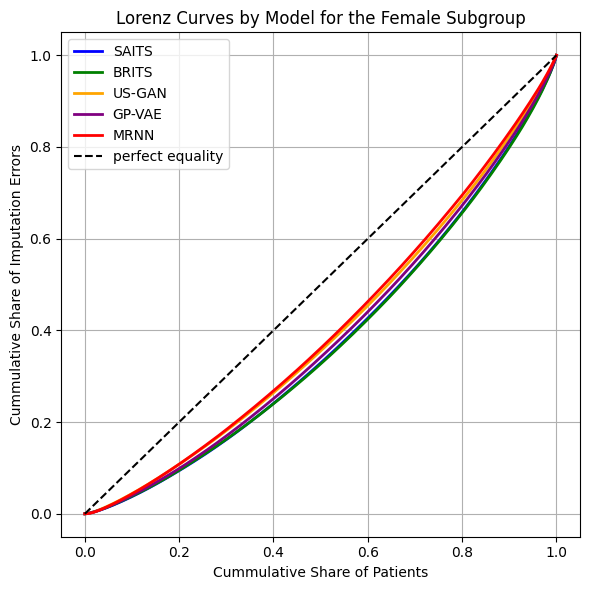

In [22]:
vs.lorenz_curve_5(saits_ae_sum[1], brits_ae_sum[1], gpvae_ae_sum[1], usgan_ae_sum[1], mrnn_ae_sum[1], "Lorenz Curves by Model for the Female Subgroup")

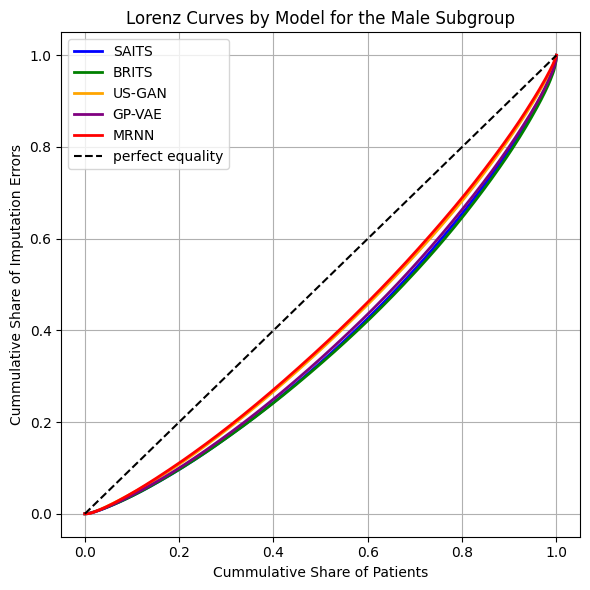

In [23]:
vs.lorenz_curve_5(saits_ae_sum[2], brits_ae_sum[2], gpvae_ae_sum[2], usgan_ae_sum[2], mrnn_ae_sum[2], "Lorenz Curves by Model for the Male Subgroup")

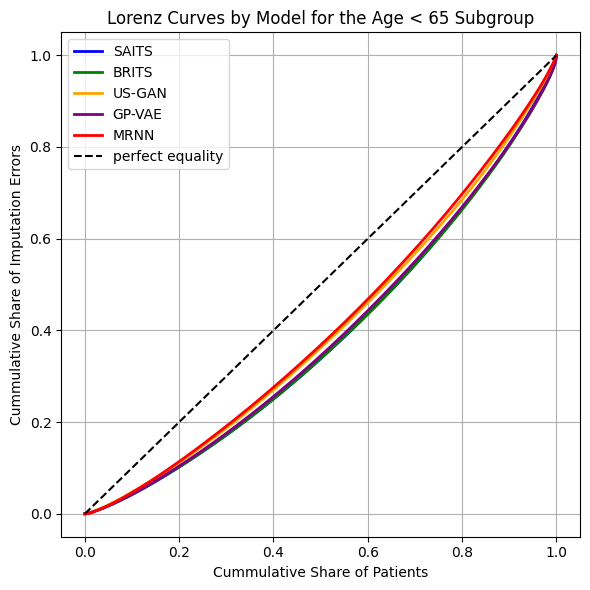

In [24]:
vs.lorenz_curve_5(saits_ae_sum[4], brits_ae_sum[4], gpvae_ae_sum[4], usgan_ae_sum[4], mrnn_ae_sum[4], "Lorenz Curves by Model for the Age < 65 Subgroup")

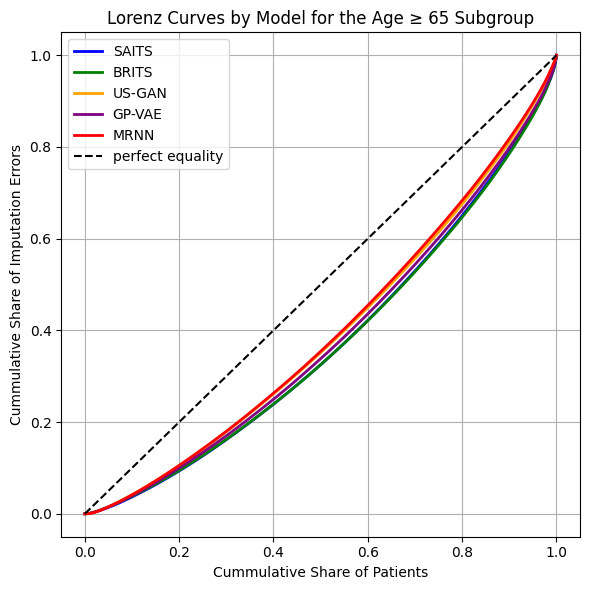

In [25]:
vs.lorenz_curve_5(saits_ae_sum[5], brits_ae_sum[5], gpvae_ae_sum[5], usgan_ae_sum[5], mrnn_ae_sum[5], "Lorenz Curves by Model for the Age ≥ 65 Subgroup")